<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/The_total_wealth_for_the_top_ten_billionaires_in_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#read the csv file
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/forbes_billionaires_2022.csv"  -o forbes_billionaires_2022.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1949k  100 1949k    0     0  13.0M      0 --:--:-- --:--:-- --:--:-- 13.0M


In [6]:
data = pd.read_csv('forbes_billionaires_2022.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

   rank                personName   age  finalWorth  year  month  \
0     1                 Elon Musk  50.0    219000.0  2022      4   
1     2                Jeff Bezos  58.0    171000.0  2022      4   
2     3  Bernard Arnault & family  73.0    158000.0  2022      4   
3     4                Bill Gates  66.0    129000.0  2022      4   
4     5            Warren Buffett  91.0    118000.0  2022      4   

                category              source        country       state  ...  \
0             Automotive       Tesla, SpaceX  United States       Texas  ...   
1             Technology              Amazon  United States  Washington  ...   
2       Fashion & Retail                LVMH         France         NaN  ...   
3             Technology           Microsoft  United States  Washington  ...   
4  Finance & Investments  Berkshire Hathaway  United States    Nebraska  ...   

                       organization selfMade gender   birthDate  \
0                             Tesla     Tru

In [7]:
#looking for total wealth column
data.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [11]:
#how many bilioners we have in total, we found 2668 bilioners
data.shape

(2668, 22)

##  Bar Chart in 2022

In [13]:
topB = data.groupby(['personName'])[['finalWorth']].sum()
topB

,finalWorth
personName,
A. Jayson Adair,1100.0
Abdulla Al Futtaim & family,2500.0
Abdulla bin Ahmad Al Ghurair & family,2600.0
Abdulsamad Rabiu,6900.0
Abhay Firodia,2800.0
...,...
Zong Qinghou,8800.0
Zong Yanmin,1300.0
Zugen Ni,1800.0


In [14]:
tb = topB.sort_values(by=["finalWorth"], ascending=False)
tb.head(10)

,finalWorth
personName,
Elon Musk,219000.0
Jeff Bezos,171000.0
Bernard Arnault & family,158000.0
Bill Gates,129000.0
Warren Buffett,118000.0
Larry Page,111000.0
Sergey Brin,107000.0
Larry Ellison,106000.0
Steve Ballmer,91400.0


In [15]:
top_tb = tb.nlargest(n=10, columns=['finalWorth'])
top_tb

,finalWorth
personName,
Elon Musk,219000.0
Jeff Bezos,171000.0
Bernard Arnault & family,158000.0
Bill Gates,129000.0
Warren Buffett,118000.0
Larry Page,111000.0
Sergey Brin,107000.0
Larry Ellison,106000.0
Steve Ballmer,91400.0


Text(0, 0.5, 'The total wealth (Bilions)')

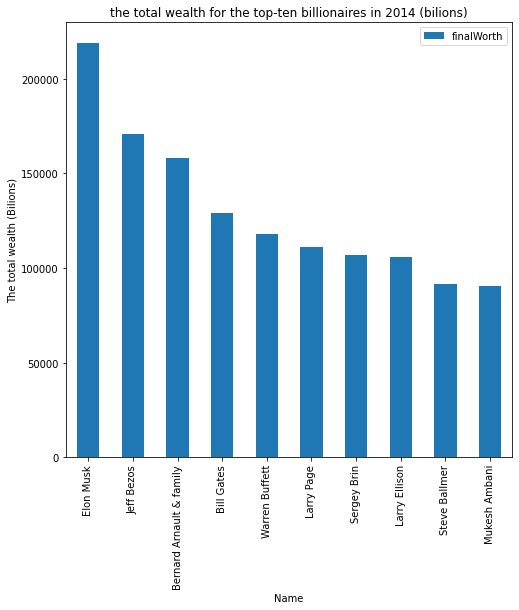

In [16]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
top_tb.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('the total wealth for the top-ten billionaires in 2022 (bilions)') # Give the plot a main title
ax.set_xlabel('Name') # Set text for the x axis
ax.set_ylabel('The total wealth (Bilions)')# Set text for y axis

## Pie Chart 

In [17]:
country = data.groupby(['country'])[['finalWorth']].sum()
country

,finalWorth
country,
Algeria,5100.0
Andorra,1300.0
Argentina,16000.0
Australia,193500.0
Austria,69500.0
...,...
United Arab Emirates,40000.0
United Kingdom,394800.0
United States,4753500.0


In [18]:
countryB = country.sort_values(by=["finalWorth"], ascending=False)
countryB.head(10)

,finalWorth
country,
United States,4753500.0
China,2145250.0
India,723000.0
Germany,498900.0
France,454600.0
United Kingdom,394800.0
Switzerland,340600.0
Hong Kong,335500.0
Russia,243800.0


In [19]:
top_c = countryB.nlargest(n=10, columns=['finalWorth'])
top_c

,finalWorth
country,
United States,4753500.0
China,2145250.0
India,723000.0
Germany,498900.0
France,454600.0
United Kingdom,394800.0
Switzerland,340600.0
Hong Kong,335500.0
Russia,243800.0


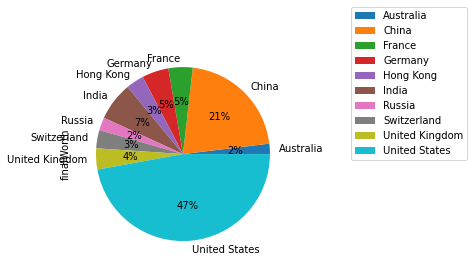

In [21]:
top_c.groupby(['country']).sum().plot(kind='pie', y='finalWorth', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.25, 1.0, 0.3, 0.2), loc='upper left')